In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:

Deberéis separar la X y la y.  
Deberéis crear el train y el test.
Ajustar vuestro modelo.


In [2]:
df = pd.read_csv("Datos/possum_completo.csv", index_col = 0)
df

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,...,x0_other,sex_f,sex_m,site_1,site_2,site_3,site_4,site_5,site_6,site_7
0,2.218955,94.1,1.134883,0.445603,-0.517732,1.231614,1.557431,0.147177,0.491222,1.241874,...,0.0,0,1,1,0,0,0,0,0,0
1,1.157937,92.5,0.231197,1.028384,-0.261331,0.810757,0.750501,0.912499,0.736833,0.150424,...,0.0,1,0,1,0,0,0,0,0,0
2,1.157937,94.0,1.005785,1.960834,1.020671,1.421000,0.921668,0.434173,1.473667,0.514241,...,0.0,1,0,1,0,0,0,0,0,0
3,1.157937,93.2,0.069825,1.144941,0.507870,1.568300,0.995025,0.147177,0.491222,0.514241,...,0.0,1,0,1,0,0,0,0,0,0
4,-0.964098,91.5,-0.188371,-0.370290,-0.517732,0.495114,1.239549,0.051512,0.736833,0.150424,...,0.0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,-1.494606,89.5,-0.285195,-1.302740,-0.261331,-0.557029,-0.325405,-0.235484,-1.964889,-2.032475,...,1.0,0,1,0,0,0,0,0,0,1
100,-1.494606,88.6,-0.704763,-1.069627,1.020671,-0.893715,-0.031976,-1.000805,-0.982445,0.150424,...,1.0,0,1,0,0,0,0,0,0,1
101,1.157937,92.4,-0.607940,0.445603,0.507870,-1.083100,-0.667739,-1.957457,-0.982445,-0.941025,...,1.0,1,0,0,0,0,0,0,0,1
102,0.096920,91.5,-0.543391,-1.069627,-0.261331,-1.209358,-0.545477,0.338508,-0.982445,-1.304842,...,1.0,0,1,0,0,0,0,0,0,1


Variable respuesta (dependiente) : hdlngth > y

Variable predictora (independiente) : skullw > X

In [3]:
X = df[["skullw"]]
y = df["hdlngth"]

In [4]:
X

,skullw
0,1.134883
1,0.231197
2,1.005785
3,0.069825
4,-0.188371
...,...
99,-0.285195
100,-0.704763
101,-0.607940
102,-0.543391


In [5]:
y

0      94.1
1      92.5
2      94.0
3      93.2
4      91.5
       ... 
99     89.5
100    88.6
101    92.4
102    91.5
103    93.6
Name: hdlngth, Length: 104, dtype: float64

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

In [7]:
lr = LinearRegression(n_jobs=-1) 

In [8]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [9]:
y_predict_train = lr.predict(x_train)
y_predict_test = lr.predict(x_test)

In [10]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
103,93.6,94.905160,Train
78,85.8,87.370403,Train
28,92.8,91.936922,Train
79,86.7,89.349228,Train
5,93.1,91.023619,Train


In [11]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
103,93.6,94.905160,Train,-1.305160
78,85.8,87.370403,Train,-1.570403
28,92.8,91.936922,Train,0.863078
79,86.7,89.349228,Train,-2.649228
5,93.1,91.023619,Train,2.076381


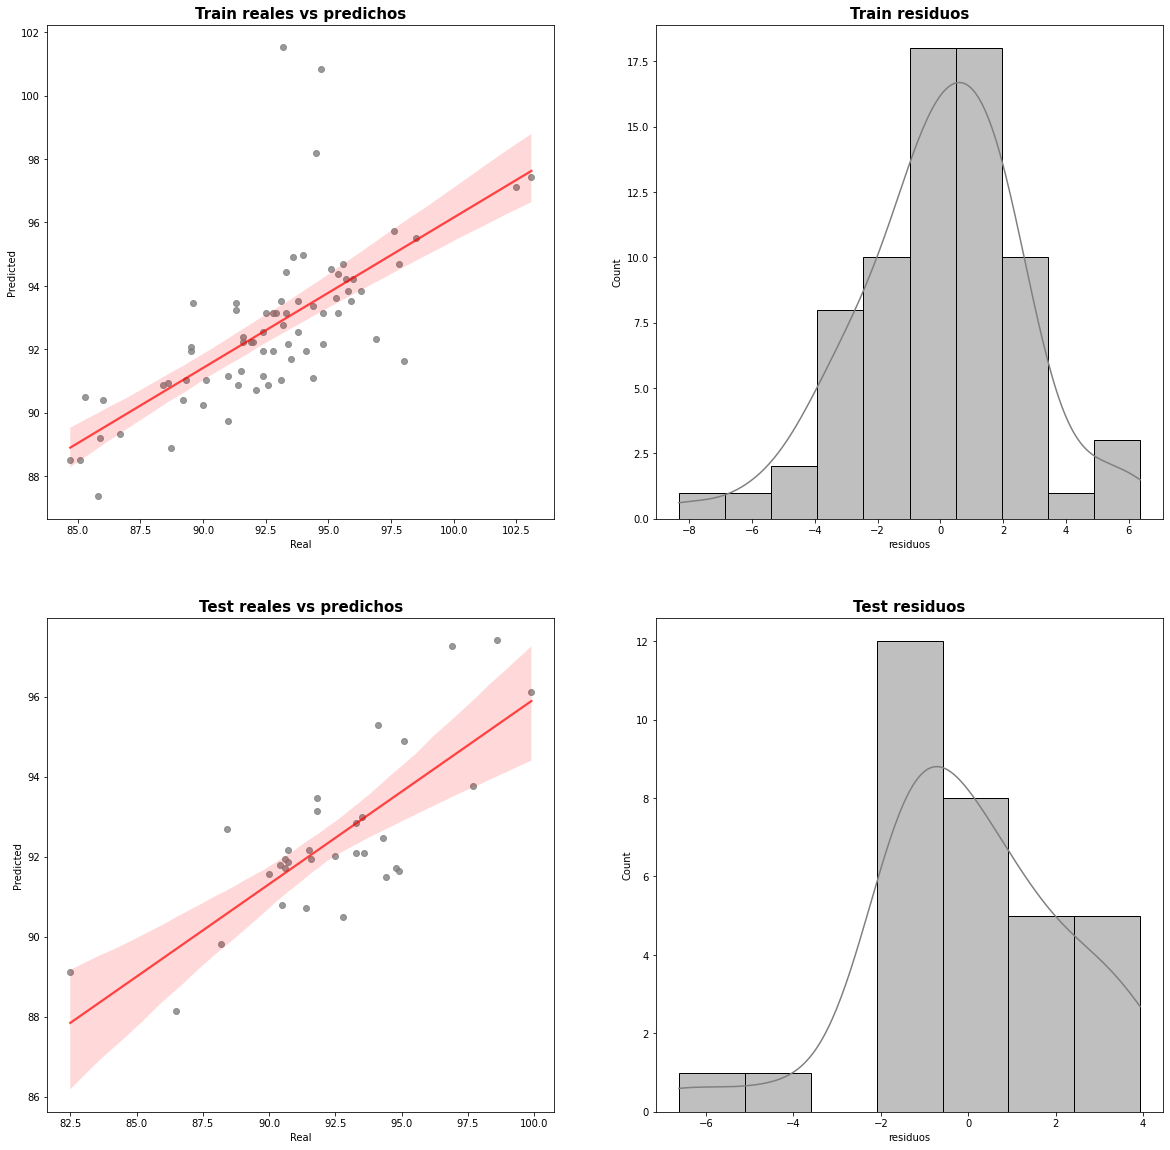

In [12]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");
